<a href="https://colab.research.google.com/github/RanjanRaj07/OpenCV_basics/blob/main/HDR_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving img_0.25.jpg to img_0.25.jpg
Saving img_0.033.jpg to img_0.033.jpg
Saving img_2.5.jpg to img_2.5.jpg
Saving img_15.jpg to img_15.jpg


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def readImagesAndTimes():
  filenames = ['img_0.033.jpg','img_0.25.jpg','img_2.5.jpg','img_15.jpg']

  times = np.array([1/30.0, 0.25, 2.5, 15.0], dtype=np.float32)

  images = []
  for filename in filenames:
    im = cv2.imread(filename)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    images.append(im)
  return images, times

In [ ]:
images, times = readImagesAndTimes()
#align the images
alignMTB = cv2.createAlignMTB()
alignMTB.process(images, images)

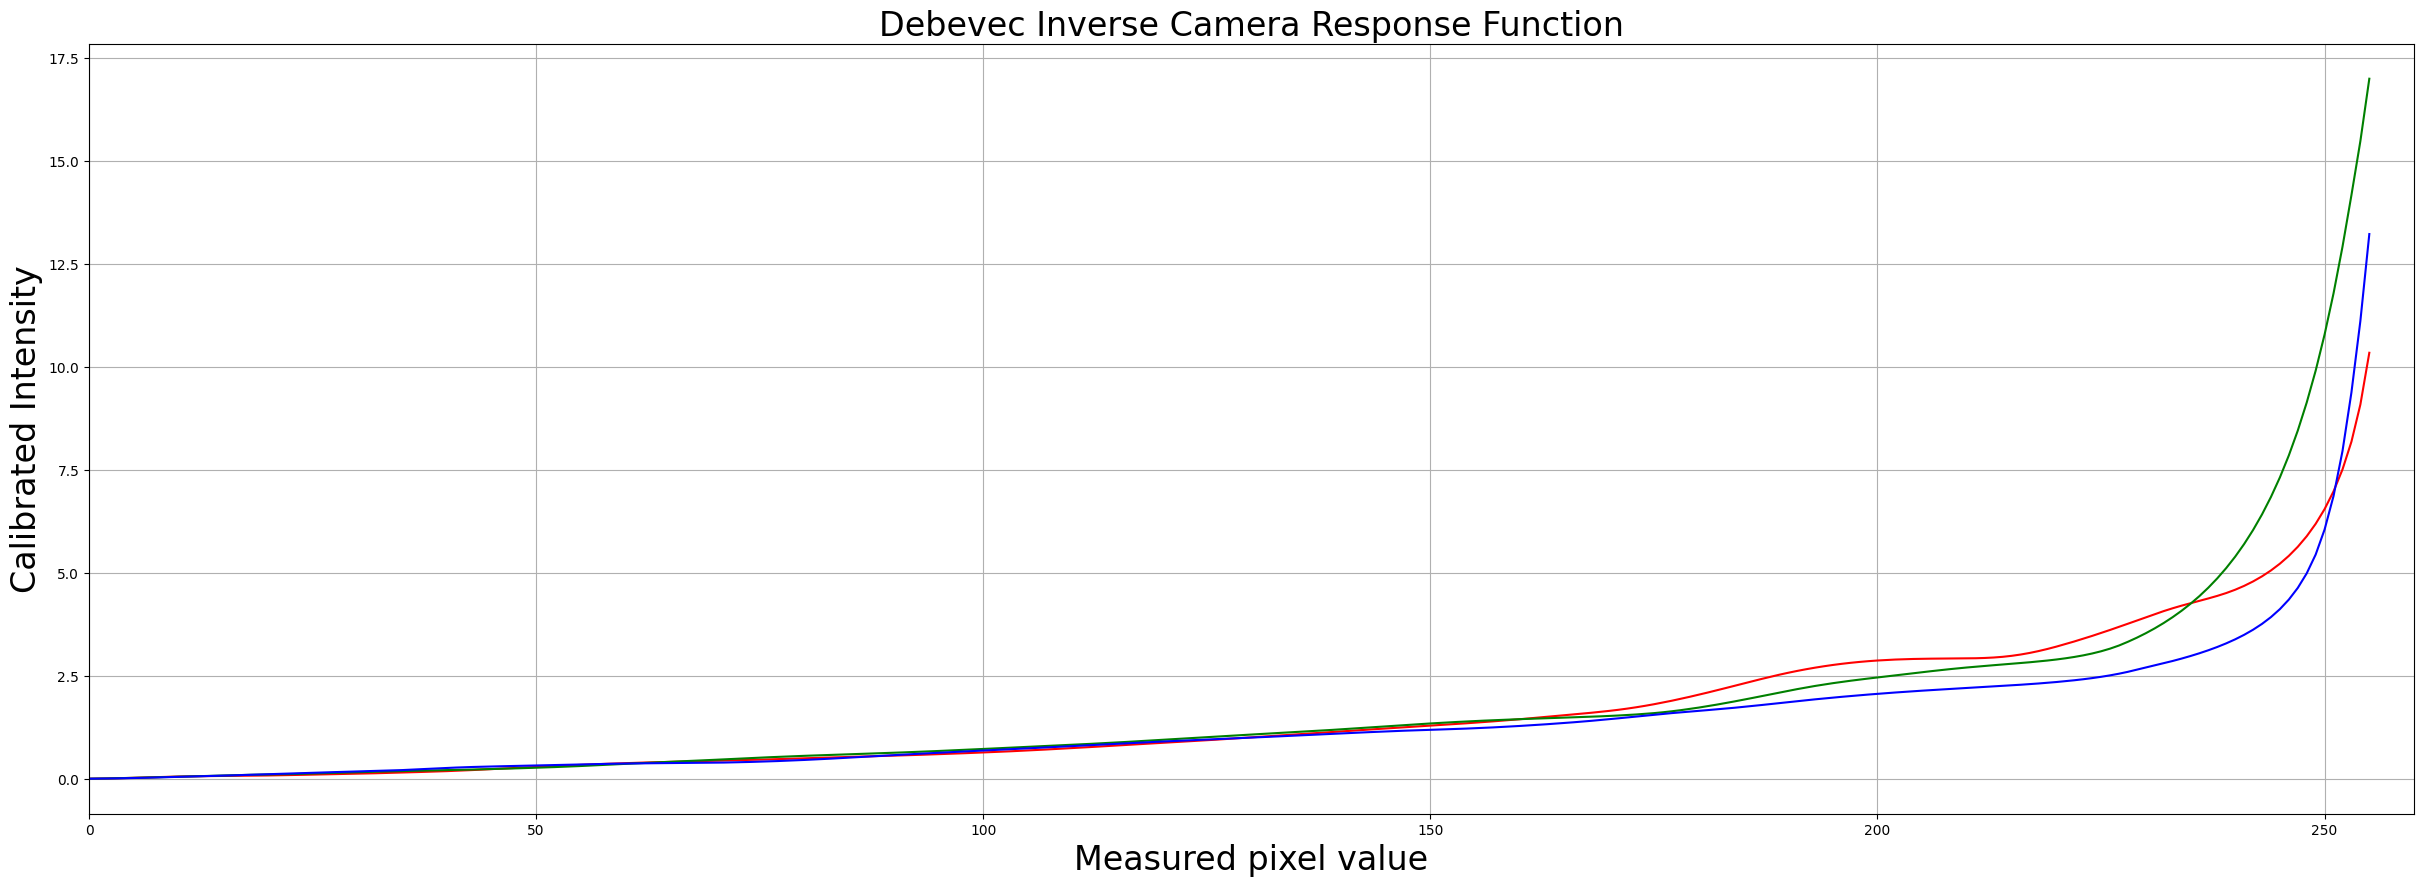

In [ ]:
#finging camera respose function (CRF)
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, times)
#Plot CRF
x=np.arange(256, dtype=np.uint8)
y=np.squeeze(responseDebevec)

ax = plt.figure(figsize=(30,10))
plt.title('Debevec Inverse Camera Response Function', fontsize=24)
plt.xlabel('Measured pixel value', fontsize=24)
plt.ylabel('Calibrated Intensity', fontsize=24)
plt.xlim([0, 260])
plt.grid()
plt.plot(x , y[:,0], 'r', x, y[:,1], 'g', x, y[:,2], 'b')

In [ ]:
#merge images into an HDR linear image
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, times, responseDebevec)

saved ldr-Drago.jpg


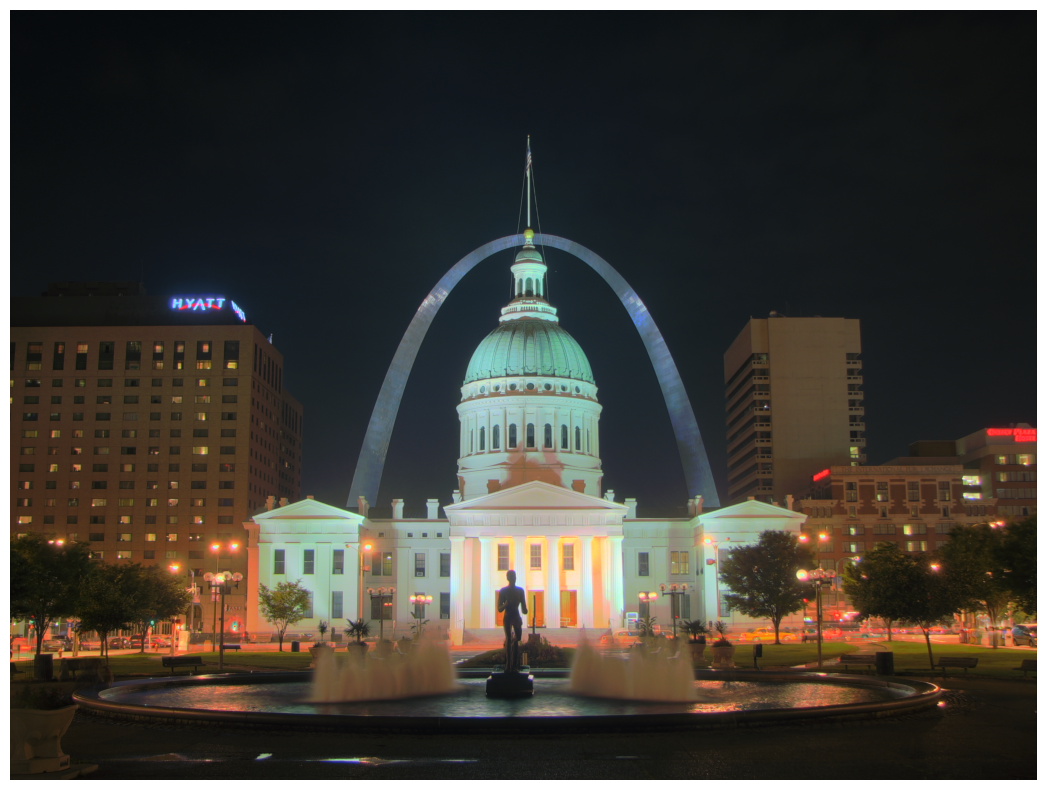

In [ ]:
#Tonemapping Drago's mathods to obtain 24-bit color image
tonemapDrago = cv2.createTonemapDrago(1.0, 0.7)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 3 * ldrDrago
plt.figure(figsize=(20,10));plt.imshow(np.clip(ldrDrago,0,1));plt.axis('off')
cv2.imwrite('ldr-Drago.jpg', ldrDrago * 255)
print('saved ldr-Drago.jpg')

Tonemaping using Reinhard method
saved ldr-Reinhard.jpg


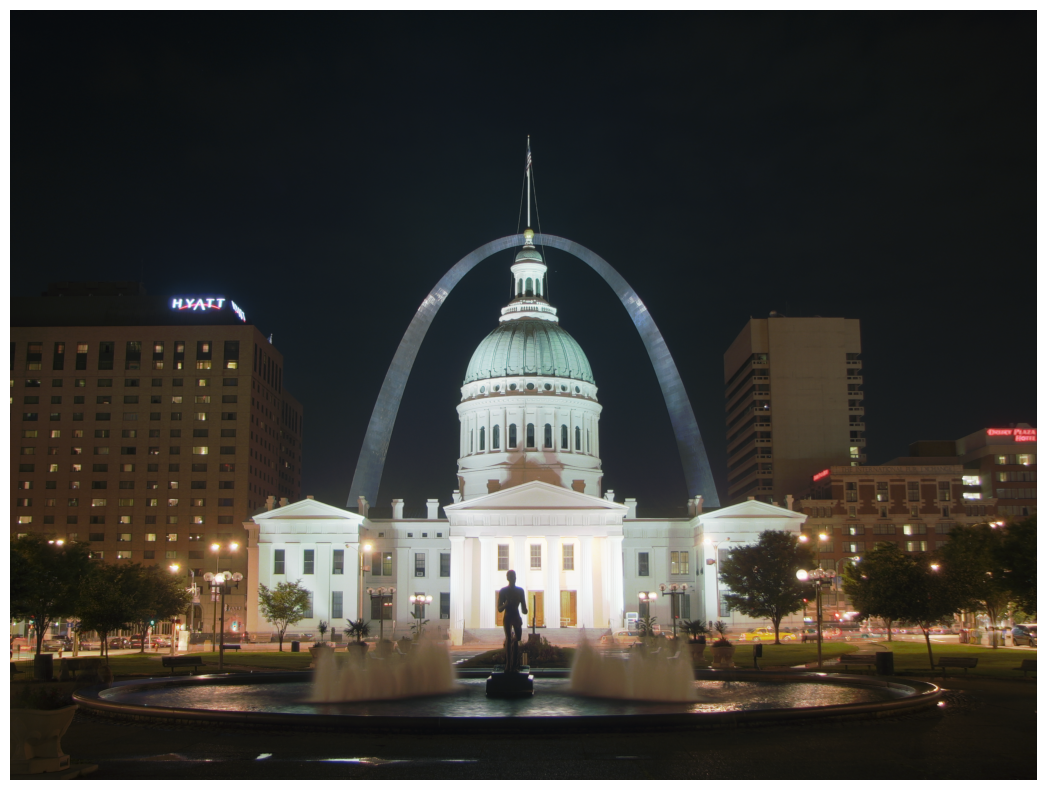

In [ ]:
#Reinhard's method
print('Tonemaping using Reinhard method')
tonemapReinhard = cv2.createTonemapReinhard(1.5,0,0,0)
ldrReinhard = tonemapReinhard.process(hdrDebevec)
plt.figure(figsize=(20,10));plt.imshow(np.clip(ldrReinhard,0,1));plt.axis('off')
cv2.imwrite('ldr-Reinhard.jpg', ldrReinhard * 255)
print('saved ldr-Reinhard.jpg')

Tonemaping using Mantiuk's method
saved ldr-Mantiuk.jpg


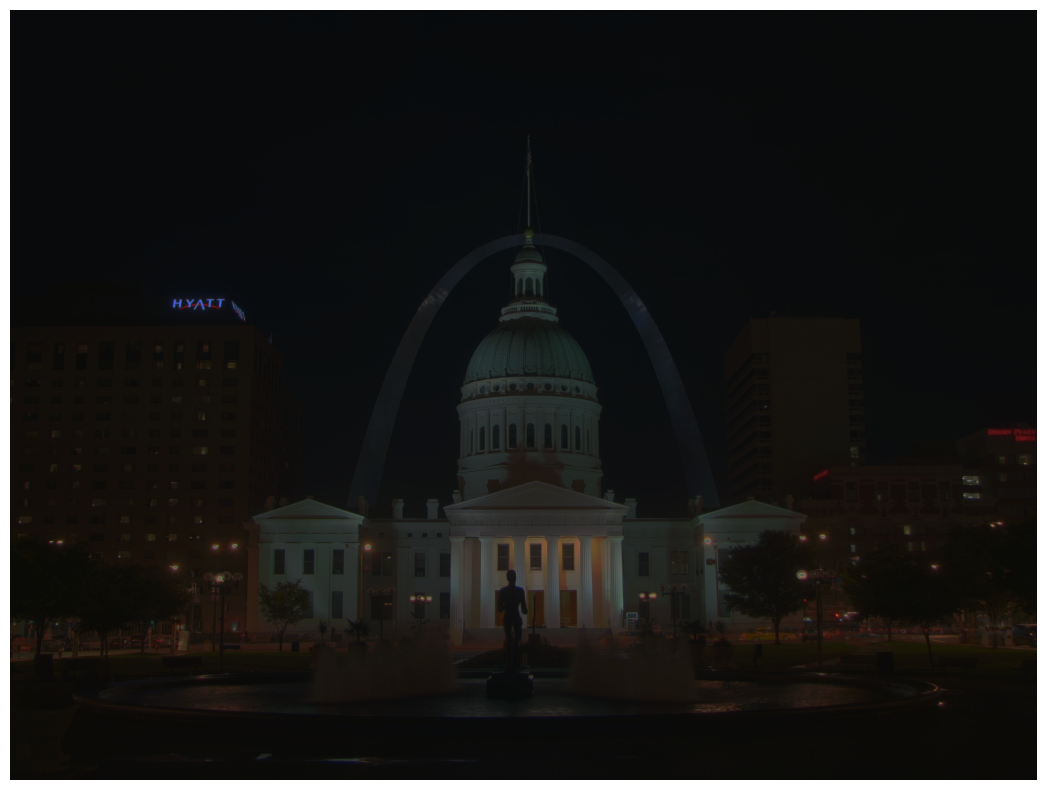

In [ ]:
#Mantiuk's mathod
print('Tonemaping using Mantiuk\'s method')
tonemapMantiuk = cv2.createTonemapMantiuk(2.2, 0.85, 1.2)
ldrMantiuk = tonemapMantiuk.process(hdrDebevec)
plt.figure(figsize=(20,10));plt.imshow(np.clip(ldrMantiuk,0,1));plt.axis('off')
cv2.imwrite('ldr-Mantiuk.jpg', ldrMantiuk * 255)
print('saved ldr-Mantiuk.jpg')